# Project for the best cities for international  students (QS Best Student Cities)

Data obtained in https://www.topuniversities.com/best-student-cities


## Methodology 
https://www.topuniversities.com/best-student-cities/methodology

### Compilation 

Each indicator is converted into an ordinal by ranking the results and subtracting the rank of each result from the maximum. In some cases the underlying data is slightly reconfigured to ensure comparable application of weights (i.e. tuition fee values are organized into ranges). The resulting scores are combined with the weights shown above (these are relative weights within the category) and scaled to the top-performing city in the category to give a score with a maximum of 100 for each category, which are then summed to produce the final score, out of a theoretical maximum of 600.

### University rankings

This category aims to reflect the collective performance of a city’s universities in the QS World University Rankings®. The indicators used reflect the magnetism of the large numbers of universities found in large cities, as well as lending recognition to the locations of the world’s elite institutions.

### Student Mix

This category is designed to look at the student make-up of the city, both overall and from an international perspective. Cities with higher proportions of students are likely to be better equipped with the facilities students need, while areas with high numbers of international students are more likely to be well-prepared to welcome even more.

### Desirability

This category aims to reflect the overall desirability of each destination. While students may be seeking exciting cities rich in opportunity, they (and their parents) are also likely to be concerned about the safety of the locality. A broad range of metrics is considered in an attempt to reflect these diverse requirements.

### Employer Activity

This category aims to provide an indication of which cities are most highly sought-after as recruiting grounds among graduate employers. Two of the indicators considered are based on QS’s annual survey of employers worldwide, which asks recruiters to identify the institutions they believe to be producing the best graduates in their sector.

### Affordability

The fifth category recognizes the importance of affordability for most prospective students and their families. It draws on a range of sources to give an indication of how affordable a city is likely to be, when tuition fees and general living expenses are considered.

### Student View

This indicator is based on a student survey which collected over 50,000 responses worldwide. It provides students with an opportunity to share their experience of studying in a particular city.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from bokeh.plotting import figure
from bokeh.io import output_file, show
from bokeh.plotting import figure, show, output_file
from bokeh.models.sources import ColumnDataSource

## Importing the data set

In [2]:
## Assign variables to each year's table for best cities, and for
## UnisPerCity,additional info and country-continent table
cities2014 = pd.read_excel('best_cities.xlsx',sheet_name='best_cities2014')
cities2015 = pd.read_excel('best_cities.xlsx',sheet_name='best_cities2015')
cities2016 = pd.read_excel('best_cities.xlsx',sheet_name='best_cities2016')
cities2017 = pd.read_excel('best_cities.xlsx',sheet_name='best_cities2017')
cities2018 = pd.read_excel('best_cities.xlsx',sheet_name='best_cities2018')

unisPerCity = pd.read_excel('best_cities.xlsx',sheet_name='unisPerCity')
citiesAdd = pd.read_excel('best_cities.xlsx',sheet_name='bestCitiesAdditional')
country_continent = pd.read_excel('Country_continent.xlsx')
totalRank = pd.read_csv('totalRank.csv')

## Preparing the data

In [3]:
## create column with list of universities by cities based on the topQSunis column and separate by ;
unisPerCity["Universities"]= unisPerCity["topQSunis"].str.split(";", expand = False) 
unisPerCity["numberUnis"] = unisPerCity["Universities"]

In [4]:
## loop to add the number of universities by counting the length of elements of each city['Universities'] list
## and append it to numberUnis column
for x in range(len(unisPerCity.city)):
    unisPerCity['numberUnis'][x] = len(unisPerCity['Universities'][x])

In [5]:
#Quick information to assess what type of information we are working with 
#print(cities2014.shape)
#print(cities2014.info())
#print(cities2014.head())
#print(cities2014.describe())

In [6]:
## assign the same rank value when the overall score is tied in the 5 datasets of the best cities
for i in range(cities2014.shape[0]-1):
    if cities2014.iloc[i,2] == cities2014.iloc[i+1,2]:
        cities2014.iloc[i+1,0] = cities2014.iloc[i,0]
        
for i in range(cities2015.shape[0]-1):
    if cities2015.iloc[i,2] == cities2015.iloc[i+1,2]:
        cities2015.iloc[i+1,0] = cities2015.iloc[i,0]
        
for i in range(cities2016.shape[0]-1):
    if cities2016.iloc[i,2] == cities2016.iloc[i+1,2]:
        cities2016.iloc[i+1,0] = cities2016.iloc[i,0]
        
for i in range(cities2017.shape[0]-1):
    if cities2017.iloc[i,2] == cities2017.iloc[i+1,2]:
        cities2017.iloc[i+1,0] = cities2017.iloc[i,0]
        
for i in range(cities2018.shape[0]-1):
    if cities2018.iloc[i,2] == cities2018.iloc[i+1,2]:
        cities2018.iloc[i+1,0] = cities2018.iloc[i,0]


In [7]:
cities2014Comp = pd.merge(cities2014, unisPerCity, on='city', how='inner')
cities2014Comp = cities2014Comp.drop(['topQSunis'], axis=1)
cities2014Comp["numberUnis"]=cities2014Comp["numberUnis"].astype(int)

cities2015Comp = pd.merge(cities2015, unisPerCity, on='city', how='inner')
cities2015Comp = cities2015Comp.drop(['topQSunis'], axis=1)
cities2015Comp["numberUnis"]=cities2015Comp["numberUnis"].astype(int)

cities2016Comp = pd.merge(cities2016, unisPerCity, on='city', how='inner')
cities2016Comp = cities2016Comp.drop(['topQSunis'], axis=1)
cities2016Comp["numberUnis"]=cities2016Comp["numberUnis"].astype(int)

cities2017Comp = pd.merge(cities2017, unisPerCity, on='city', how='inner')
cities2017Comp = cities2017Comp.drop(['topQSunis'], axis=1)
cities2017Comp["numberUnis"]=cities2017Comp["numberUnis"].astype(int)

cities2018Comp = pd.merge(cities2018, unisPerCity, on='city', how='inner')
cities2018Comp = cities2018Comp.drop(['topQSunis'], axis=1)
cities2018Comp["numberUnis"]=cities2018Comp["numberUnis"].astype(int)

In [8]:
lis2014 = []
for x in range (50):
    lis2014.append(2014)
d = {'overall': cities2014Comp['overall'], 'year': lis2014}
df = pd.DataFrame(data=d)



In [9]:
# have to create a list of the 5 years changing the values of each
lis2015 = []
for x in range (50):
    lis2015.append(2015)
d = {'overall': cities2015Comp['overall'], 'year': lis2015}
dx = pd.DataFrame(data=d)
df = df.append(dx)

lis2016 = []
for x in range (75):
    lis2016.append(2016)
d = {'overall': cities2016Comp['overall'], 'year': lis2016}
dx = pd.DataFrame(data=d)
df = df.append(dx)


lis2017 = []
for x in range (100):
    lis2017.append(2017)
d = {'overall': cities2017Comp['overall'], 'year': lis2017}
dx = pd.DataFrame(data=d)
df = df.append(dx)

lis2018 = []
for x in range (101):
    lis2018.append(2018)
d = {'overall': cities2018Comp['overall'], 'year': lis2018}
dx = pd.DataFrame(data=d)
df = df.append(dx)


## Plotting

### Boxplot/Violin of the Overall score by year

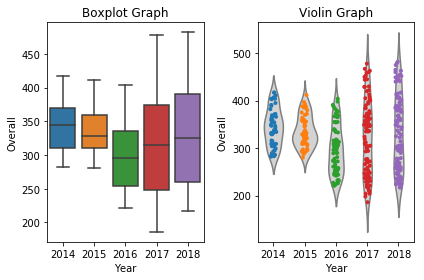

In [11]:
plt.subplot(1,2,1)
sns.boxplot(x='year',y='overall',data=df)
plt.xlabel('Year')
plt.ylabel('Overall')
plt.title('Boxplot Graph')
plt.subplot(1,2,2)
sns.violinplot(x='year',y='overall',data=df,inner=None,color='lightgray')
sns.stripplot(x='year',y='overall',data=df,size=4,jitter=True)
plt.xlabel('Year')
plt.ylabel('Overall')
plt.title('Violin Graph')
plt.tight_layout()
plt.savefig('boxViol_Overall_Year.eps', format='eps', dpi=900)
plt.show()

In [11]:
#years = pd.DataFrame([cities2014Comp['overall'],cities2015Comp['overall'],cities2016Comp['overall'],cities2017Comp['overall'],cities2018Comp['overall']])
#years = years.T
#years.columns = [2014,2015, 2016,2017,2018]
#years.tail(3) 

In [12]:
countries = unisPerCity['country'].unique()
len(countries)
countries

array(['United Kingdom', 'Australia', 'Netherlands', 'Turkey', 'Greece',
       'United States', 'New Zealand', 'Thailand', 'Spain', 'China',
       'Germany', 'Colombia', 'Czech Republic', 'Belgium', 'Hungary',
       'Argentina', 'Egypt', 'South Africa', 'Denmark', 'South Korea',
       'United Arab Emirates', 'Ireland', 'Sweden', 'Austria', 'Finland',
       'Hong Kong', 'Taiwan', 'Ukraine', 'Malaysia', 'Japan', 'France',
       'Peru', 'Portugal', 'Philippines', 'Mexico', 'Italy', 'Canada',
       'Russia', 'India', 'Norway', 'Brazil', 'Saudi Arabia', 'Chile',
       'Lithuania', 'Poland', 'Switzerland'], dtype=object)

In [13]:
continents = unisPerCity['continent'].unique()
len(continents)
continents

array(['Europe', 'Oceania', 'Asia', 'North America', 'Latin America',
       'Africa'], dtype=object)

In [14]:
universitiesByContinent = []
for x in continents:
    universitiesByContinent.append(unisPerCity[unisPerCity['continent'] == x]['numberUnis'])

totalUniPerContinent = []
for x in range(len(continents)):
    totalUniPerContinent.append(universitiesByContinent[x].sum())

totalUniPerContinent = np.asarray(totalUniPerContinent, dtype=np.int32)
print(totalUniPerContinent)

[160  30 131  65  43   7]


In [15]:
totalCitiesPerContinent = []
for x in continents:
    totalCitiesPerContinent.append(unisPerCity['city'][unisPerCity['continent'] == x].count())
totalCitiesPerContinent


[46, 9, 26, 18, 8, 3]

In [16]:
totalCitiesPerCountry = []
for x in countries:
    totalCitiesPerCountry.append(unisPerCity['city'][unisPerCity['country'] == x].count())
len(totalCitiesPerCountry)


46

In [17]:
universitiesByCountry = []
for x in countries:
    universitiesByCountry.append(unisPerCity[unisPerCity['country'] == x]['numberUnis'])

totalUniPerCountry = []
for x in range(len(countries)):
    totalUniPerCountry.append(universitiesByCountry[x].sum())

totalUniPerCountry = np.asarray(totalUniPerCountry, dtype=np.int32)


In [18]:
country_Cities = pd.DataFrame({"country": countries, "totalCities": totalCitiesPerCountry,'totalUniPerCountry':totalUniPerCountry})

country_Cities.head()

,country,totalCities,totalUniPerCountry
0,United Kingdom,10,38
1,Australia,7,26
2,Netherlands,1,2
3,Turkey,2,10
4,Greece,1,3


In [19]:
countryCitiesCont = pd.merge(country_Cities, unisPerCity, on='country', how='inner')
countryCitiesCont.drop_duplicates(subset ="country", 
                     keep = 'first', inplace = True)
countryCitiesCont = countryCitiesCont.reset_index()
countryCitiesCont = countryCitiesCont.drop(['index',"city", "topQSunis",'Universities','numberUnis'], axis=1)
countryCitiesCont = countryCitiesCont.rename(index=str, columns={"continent_y": "continent"})
countryCitiesCont.head(5)

,country,totalCities,totalUniPerCountry,continent
0,United Kingdom,10,38,Europe
1,Australia,7,26,Oceania
2,Netherlands,1,2,Europe
3,Turkey,2,10,Asia
4,Greece,1,3,Europe


### Plot of Number of Cities per country
Color is the Continent 

Size is the number of universities

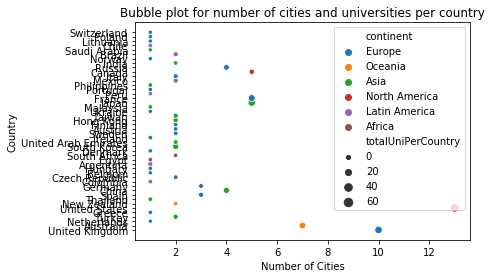

In [20]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(x="totalCities",y="country", hue="continent", size="totalUniPerCountry",data=countryCitiesCont)
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Add titles (main and on axis)
plt.xlabel("Number of Cities")
plt.ylabel("Country")
plt.title("Bubble plot for number of cities and universities per country")
plt.savefig('scatter_cit_count_cont.eps', format='eps', dpi=900)
plt.show()

### Plot number of universities per continent
Color is the continent 
Size is the number of cities

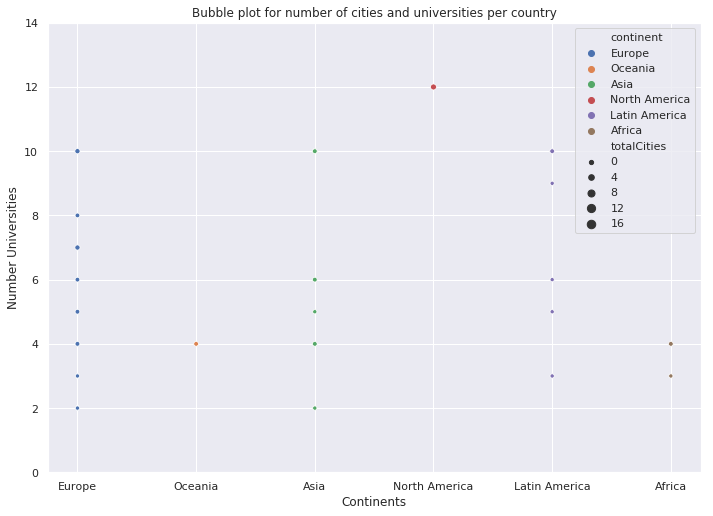

In [22]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(y=countryCitiesCont["totalUniPerCountry"], x=countryCitiesCont["continent"],hue=countryCitiesCont["continent"], size=countryCitiesCont["totalCities"])
sns.set(rc={'figure.figsize':(11.7,8.27)})


# Add titles (main and on axis)
plt.xlabel("Continents")
plt.ylabel("Number Universities")
plt.title("Bubble plot for number of cities and universities per country")
#plt.xlim(-1,6)
plt.ylim(0,14)

plt.show()

### Interactive plot

In [23]:
import numpy as np

from bokeh.plotting import figure, show, output_file
source = ColumnDataSource(countryCitiesCont)

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS)

p.scatter('totalCities', 'country',source=source, radius='totalUniPerCountry',
          fill_color='continent', fill_alpha=0.6,
          line_color=None)

output_file("color_scatter.html", title="color_scatter.py example")

show(p)  # open a browser

In [24]:
#sns.pairplot(cities2018,kind='reg',hue='city')

### Scatterplot per year for all varibales

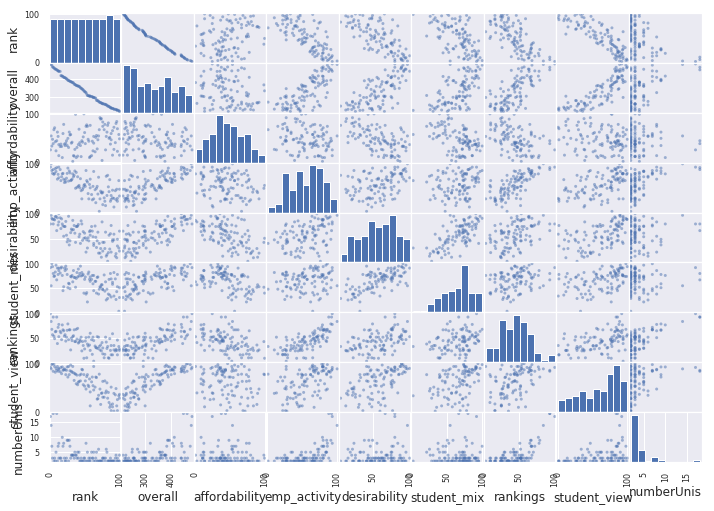

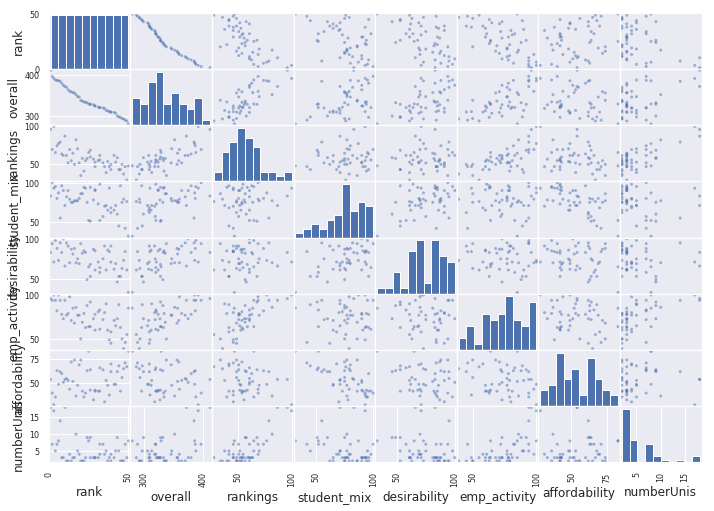

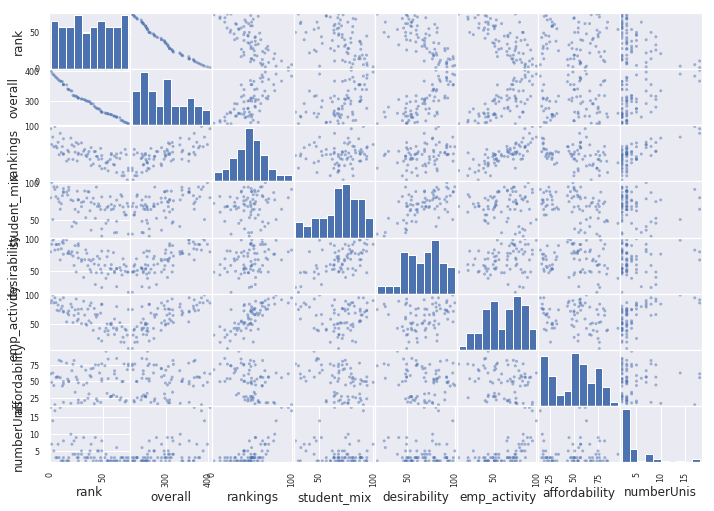

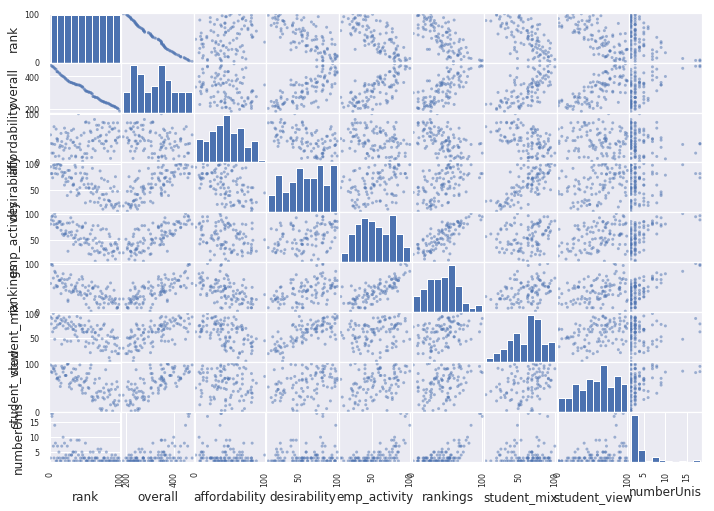

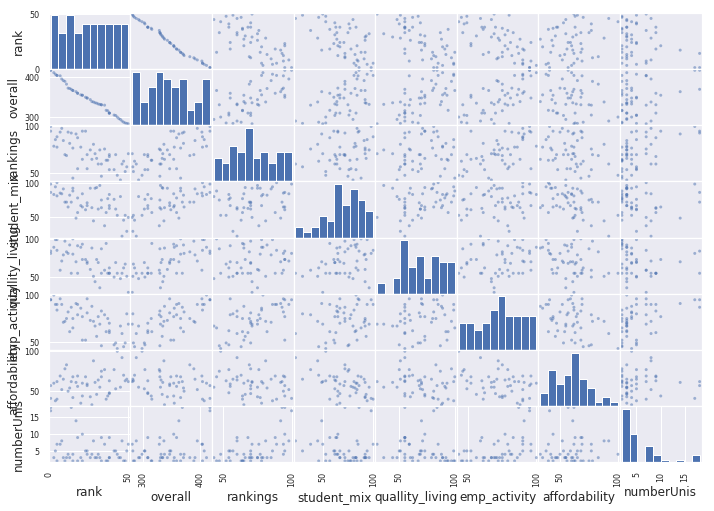

In [26]:
citiesMat = scatter_matrix(cities2018Comp)
plt.savefig('scatterMat_2018.eps', format='eps', dpi=900)
_ = scatter_matrix(cities2015Comp)
plt.savefig('scatterMat_2015.eps', format='eps', dpi=900)
_ = scatter_matrix(cities2016Comp)
plt.savefig('scatterMat_2016.eps', format='eps', dpi=900)
_ = scatter_matrix(cities2017Comp)
plt.savefig('scatterMat_2017.eps', format='eps', dpi=900)
_ = scatter_matrix(cities2014Comp)
plt.savefig('scatterMat_2014.eps', format='eps', dpi=900)

## Correlation matrices and heatmaps per year

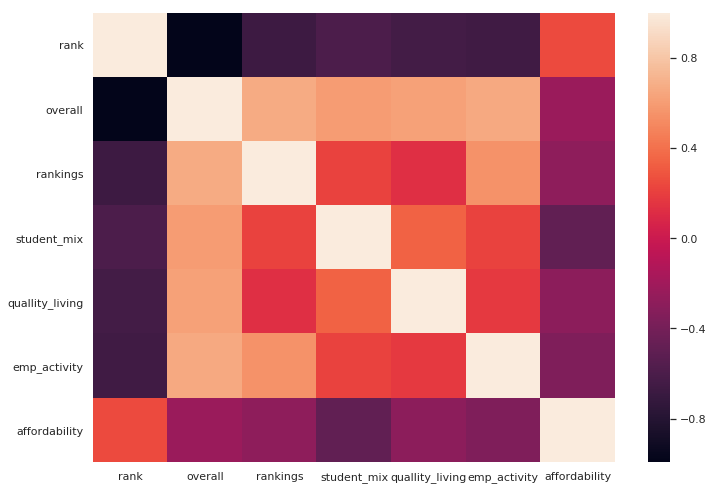

In [30]:
corr14 = cities2014.corr()
corr14.style.background_gradient()

sns.heatmap(corr14)
plt.savefig('corr_2014.eps', format='eps', dpi=900)
# Display the heatmap
plt.show()

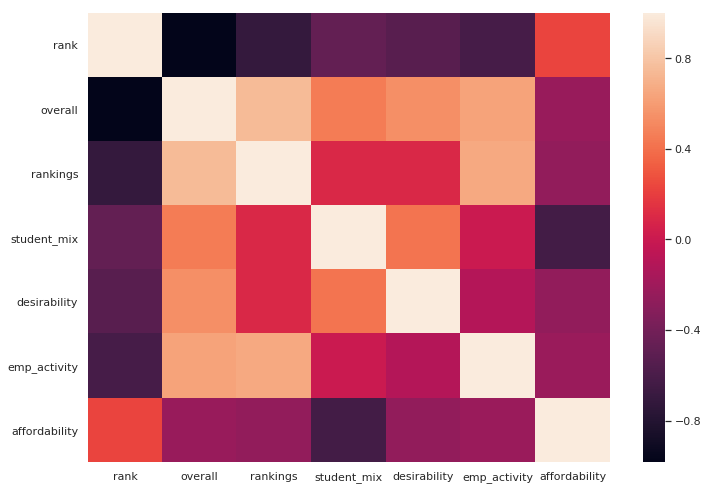

In [27]:
corr15 = cities2015.corr()
corr15.style.background_gradient()
sns.heatmap(corr15)
plt.savefig('corr_2015.eps', format='eps', dpi=900)
# Display the heatmap
plt.show()

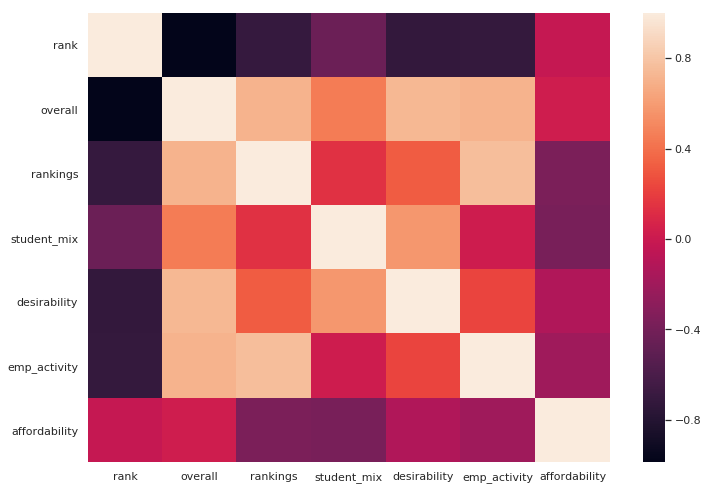

In [28]:
corr16 = cities2016.corr()
corr16.style.background_gradient()
sns.heatmap(corr16)
plt.savefig('corr_2016.eps', format='eps', dpi=900)
# Display the heatmap
plt.show()

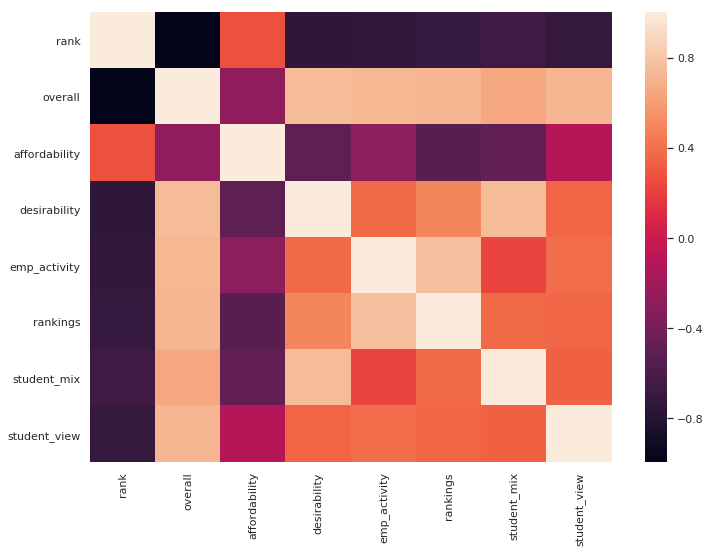

In [29]:
corr17 = cities2017.corr()
corr17.style.background_gradient()
sns.heatmap(corr17)
# Display the heatmap
plt.savefig('corr_2017.eps', format='eps', dpi=900)
plt.show()

In [26]:
corr18 = cities2018Comp.corr()
corr18.style.background_gradient()

,rank,overall,affordability,emp_activity,desirability,student_mix,rankings,student_view,numberUnis
rank,1,-0.994531,0.218335,-0.74204,-0.707865,-0.589575,-0.704783,-0.847699,-0.471336
overall,-0.994531,1,-0.223459,0.752005,0.721274,0.591653,0.718262,0.836842,0.492806
affordability,0.218335,-0.223459,1,-0.213045,-0.545349,-0.46644,-0.452124,-0.179142,-0.0945328
emp_activity,-0.74204,0.752005,-0.213045,1,0.370282,0.171978,0.727924,0.509362,0.548661
desirability,-0.707865,0.721274,-0.545349,0.370282,1,0.672381,0.46613,0.532291,0.151597
student_mix,-0.589575,0.591653,-0.46644,0.171978,0.672381,1,0.296371,0.422313,0.0339517
rankings,-0.704783,0.718262,-0.452124,0.727924,0.46613,0.296371,1,0.474959,0.698099
student_view,-0.847699,0.836842,-0.179142,0.509362,0.532291,0.422313,0.474959,1,0.35387
numberUnis,-0.471336,0.492806,-0.0945328,0.548661,0.151597,0.0339517,0.698099,0.35387,1


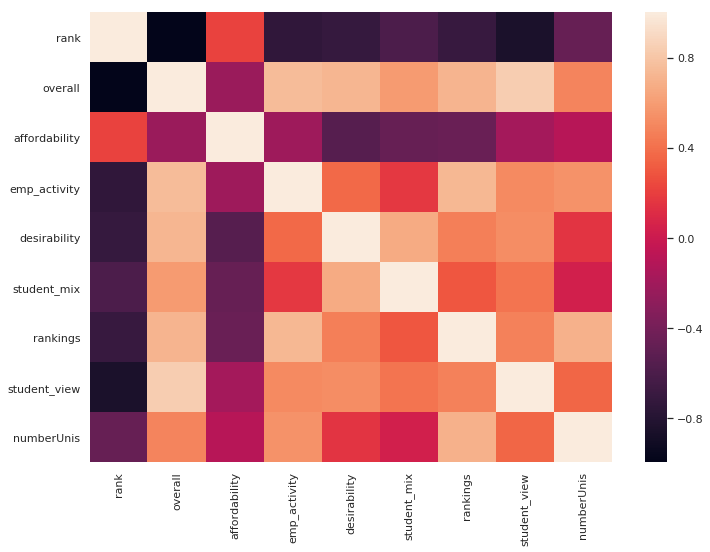

In [31]:
corr18 = cities2018Comp.corr()
corr18.style.background_gradient()
sns.heatmap(corr18)
# Display the heatmap
plt.savefig('corr_2018.eps', format='eps', dpi=900)
plt.show()

## Mexico City and Monterrey case study

In [33]:
##Assign variables to each year of Mexico City and Monterrey
mexico2014 = cities2014[cities2014['city'] == 'Mexico City']
mexico2014.insert(1, 'year', 2014)
mexico2015 = cities2015[cities2015['city'] == 'Mexico City']
mexico2015.insert(1, 'year', 2015)
mexico2016 = cities2016[cities2016['city'] == 'Mexico City']
mexico2016.insert(1, 'year', 2016)
mexico2017 = cities2017[cities2017['city'] == 'Mexico City']
mexico2017.insert(1, 'year', 2017)
mexico2018 = cities2018[cities2018['city'] == 'Mexico City']
mexico2018.insert(1, 'year', 2018)

mexicoList = [mexico2014,mexico2015,mexico2016,mexico2017,mexico2018]
mexico = pd.DataFrame()



for x in mexicoList:
    mexico = mexico.append(x, sort=True)
mexico



,affordability,city,desirability,emp_activity,overall,quallity_living,rank,rankings,student_mix,student_view,year
45,92.0,Mexico City,NaN,59.0,289,55.0,46,60.0,23.0,NaN,2014
49,83.0,Mexico City,33.0,85.0,280,NaN,50,47.0,32.0,NaN,2015
49,76.3,Mexico City,25.5,84.5,261,NaN,49,46.9,27.9,NaN,2016
50,82.0,Mexico City,25.0,82.0,312,NaN,51,51.0,33.0,38.0,2017
51,74.0,Mexico City,25.0,86.0,322,NaN,52,51.0,38.0,47.0,2018


In [34]:
monterrey2016 = cities2016[cities2016['city'] == 'Monterrey']
monterrey2016.insert(1, 'year', 2016)
monterrey2017 = cities2017[cities2017['city'] == 'Monterrey']
monterrey2017.insert(1, 'year', 2017)
monterrey2018 = cities2018[cities2018['city'] == 'Monterrey']
monterrey2018.insert(1, 'year', 2018)

monterreyList = [monterrey2016,monterrey2017,monterrey2018]
monterrey = pd.DataFrame()

for x in monterreyList:
    monterrey = monterrey.append(x, sort=True)
monterrey



,affordability,city,desirability,emp_activity,overall,rank,rankings,student_mix,student_view,year
74,73.4,Monterrey,18.0,75.3,221,74,23.9,30.7,NaN,2016
75,82.0,Monterrey,13.0,71.0,247,76,27.0,25.0,29.0,2017
82,76.0,Monterrey,7.0,76.0,247,83,33.0,29.0,28.0,2018


### Table with information of indicators and positions of Mexico City and Monterrey in the QS Best Student Cities

In [35]:
mex_mont = mexico.append(monterrey,sort=False)
mex_mont

,affordability,city,desirability,emp_activity,overall,quallity_living,rank,rankings,student_mix,student_view,year
45,92.0,Mexico City,NaN,59.0,289,55.0,46,60.0,23.0,NaN,2014
49,83.0,Mexico City,33.0,85.0,280,NaN,50,47.0,32.0,NaN,2015
49,76.3,Mexico City,25.5,84.5,261,NaN,49,46.9,27.9,NaN,2016
50,82.0,Mexico City,25.0,82.0,312,NaN,51,51.0,33.0,38.0,2017
51,74.0,Mexico City,25.0,86.0,322,NaN,52,51.0,38.0,47.0,2018
74,73.4,Monterrey,18.0,75.3,221,NaN,74,23.9,30.7,NaN,2016
75,82.0,Monterrey,13.0,71.0,247,NaN,76,27.0,25.0,29.0,2017
82,76.0,Monterrey,7.0,76.0,247,NaN,83,33.0,29.0,28.0,2018


### Plot with the positions of the two cities for the five years

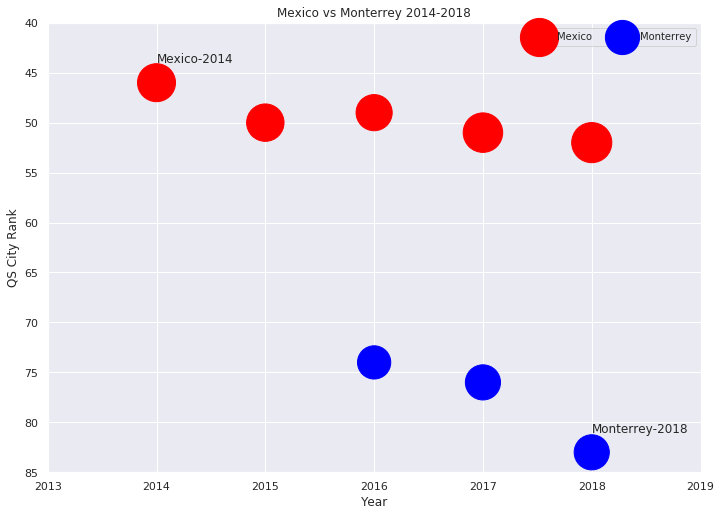

In [36]:

mex = plt.scatter(mexico["year"],mexico["rank"] , marker='o', color='red',s=mexico["overall"]*5)
mont = plt.scatter(monterrey["year"],monterrey["rank"] , marker='o', color='blue',s=monterrey["overall"]*5)
plt.text(2018, 81, 'Monterrey-2018')
plt.text(2014, 44, 'Mexico-2014')
plt.title('Mexico vs Monterrey 2014-2018')
plt.legend((mex,mont), ('Mexico','Monterrey'),
           scatterpoints=1,
           loc='upper right',
           ncol=2, 
           fontsize=10)
plt.xlabel('Year')
plt.ylabel('QS City Rank')
plt.xlim(2013,2019)
plt.ylim(85,40)
plt.savefig('mont_mex.eps', format='eps', dpi=900)
plt.show()

In [37]:
# plotear los 5 años mexico 
# plotear los 3 años monterrey
# estimar el peso de las universidades

# tabla con indicadores de monterrey y mexico 1 tabla

mex_montComp = unisPerCity[(unisPerCity['city']=='Mexico City')]
mex_montComp["numberUnis"]=mex_montComp["numberUnis"].astype(int)
mex_montComp = mex_montComp.append(unisPerCity[(unisPerCity['city']=='Monterrey')])
mex_montComp

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,city,country,continent,topQSunis,Universities,numberUnis
56,Mexico City,Mexico,Latin America,Universidad Nacional Autónoma de México (UNAM)...,[Universidad Nacional Autónoma de México (UNAM...,8
59,Monterrey,Mexico,Latin America,Tecnológico de Monterrey (ITESM); Universidad ...,"[Tecnológico de Monterrey (ITESM), Universida...",2


In [38]:
## create list of universities of Mexico City
unisMex = []
for x in mex_montComp.iloc[0,-2]:
    unisMex.append(x)
#\remove \xa0 from the strings of the universities in Mexico City
unisMex = [el.replace('\xa0','') for el in unisMex]
unisMex

['Universidad Nacional Autónoma de México (UNAM)',
 'Instituto Tecnológico Autonomo de México (ITAM)',
 'Instituto Politécnico Nacional (IPN)',
 'Universidad Iberoamericana (UIA)',
 'Universidad Anáhuac',
 'Universidad Panamericana (UP)',
 'Universidad Autónoma Metropolitana (UAM)',
 'Universidad Autónoma del Estado de México (UAEMex)']

In [39]:
## create list of universities of Monterrey
unisMont = []
for x in mex_montComp.iloc[1,-2]:
    unisMont.append(x)
#\remove \xa0 from the strings of the universities in Monterrey
unisMont = [el.replace('\xa0','') for el in unisMont]
unisMont

['Tecnológico de Monterrey (ITESM)',
 'Universidad Autónoma de Nuevo León (UANL)']

In [40]:
unam11_19 = totalRank[(totalRank['Institution.'] == 'Universidad Nacional Autónoma De México (UNAM)')]
tec11_19 = totalRank[(totalRank['Institution.'] == 'Tecnológico De Monterrey (ITESM)')]

### Plot of the position of the QS Top universities of Mexico City (UNAM) and Monterrey (ITESM) for 2011-2019

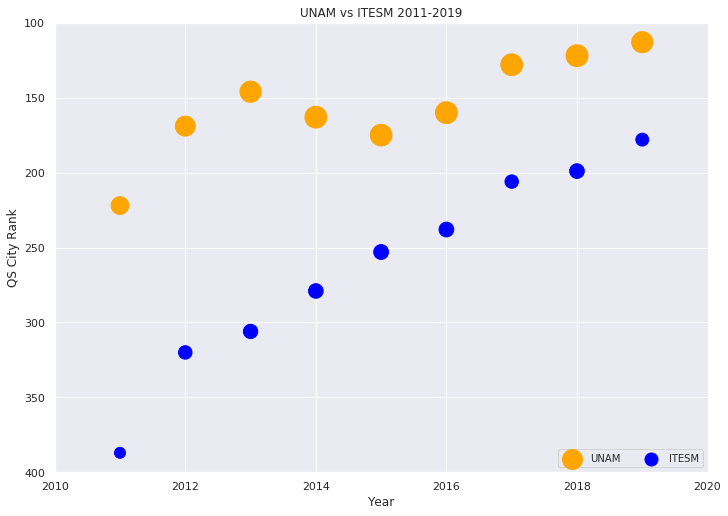

In [41]:
unamPlot = plt.scatter(unam11_19["Year"],unam11_19["Rank"] , marker='o', color='orange',s=unam11_19["Academic.Reputation.Score"]*5)
itesmPlot = plt.scatter(tec11_19["Year"],tec11_19["Rank"] , marker='o', color='blue',s=tec11_19["Academic.Reputation.Score"]*5)
#plt.text(2018, 81, 'ITESM-2018')
#plt.text(2014, 44, 'UNAM-2014')
plt.title('UNAM vs ITESM 2011-2019')
plt.legend((unamPlot,itesmPlot), 
            ('UNAM','ITESM'),
           scatterpoints=1,
           loc='lower right',
           ncol=2, 
           fontsize=10)
plt.xlabel('Year')
plt.ylabel('QS City Rank')
plt.xlim(2010,2020)
plt.ylim(400,100)
plt.savefig('unam_tec.eps', format='eps', dpi=900)
plt.show()

### Plot with the number of cities per country 
Continent is the color

Size is the number of universities per country

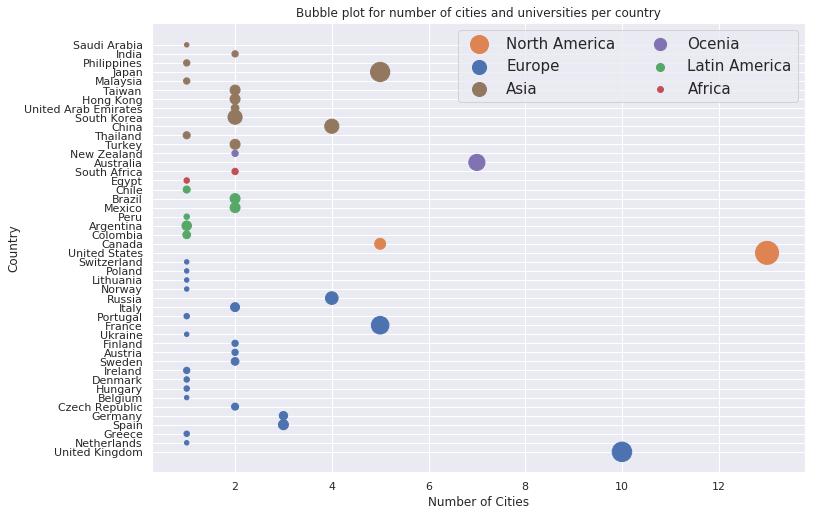

In [43]:

europePlot = plt.scatter(x=countryCitiesCont["totalCities"][(countryCitiesCont['continent'] == 'Europe')],
                     y=countryCitiesCont['country'][(countryCitiesCont['continent'] == 'Europe')],
                     s=countryCitiesCont["totalUniPerCountry"][(countryCitiesCont['continent'] == 'Europe')]*10)
northAmericaPlot = plt.scatter(x=countryCitiesCont["totalCities"][(countryCitiesCont['continent'] == 'North America')],
                     y=countryCitiesCont['country'][(countryCitiesCont['continent'] == 'North America')],
                     s=countryCitiesCont["totalUniPerCountry"][(countryCitiesCont['continent'] == 'North America')]*10)
latAmericaPlot = plt.scatter(x=countryCitiesCont["totalCities"][(countryCitiesCont['continent'] == 'Latin America')],
                     y=countryCitiesCont['country'][(countryCitiesCont['continent'] == 'Latin America')],
                     s=countryCitiesCont["totalUniPerCountry"][(countryCitiesCont['continent'] == 'Latin America')]*10)
africaPlot = plt.scatter(x=countryCitiesCont["totalCities"][(countryCitiesCont['continent'] == 'Africa')],
                     y=countryCitiesCont['country'][(countryCitiesCont['continent'] == 'Africa')],
                     s=countryCitiesCont["totalUniPerCountry"][(countryCitiesCont['continent'] == 'Africa')]*10)
oceaniaPlot = plt.scatter(x=countryCitiesCont["totalCities"][(countryCitiesCont['continent'] == 'Oceania')],
                     y=countryCitiesCont['country'][(countryCitiesCont['continent'] == 'Oceania')],
                     s=countryCitiesCont["totalUniPerCountry"][(countryCitiesCont['continent'] == 'Oceania')]*10)
asiaPlot = plt.scatter(x=countryCitiesCont["totalCities"][(countryCitiesCont['continent'] == 'Asia')],
                     y=countryCitiesCont['country'][(countryCitiesCont['continent'] == 'Asia')],
                     s=countryCitiesCont["totalUniPerCountry"][(countryCitiesCont['continent'] == 'Asia')]*10)

plt.legend((northAmericaPlot,europePlot,asiaPlot,oceaniaPlot,latAmericaPlot,africaPlot), 
            ('North America','Europe','Asia','Ocenia','Latin America','Africa'),
           scatterpoints=1,
           loc='upper right',
           ncol=2, 
           fontsize=15)

# Add titles (main and on axis)
plt.xlabel("Number of Cities")
plt.ylabel("Country")
plt.title("Bubble plot for number of cities and universities per country")
plt.savefig('bubble_Cities_Country.eps', format='eps', dpi=900)
plt.show()

### Number of universities per Overall Rank for the five years

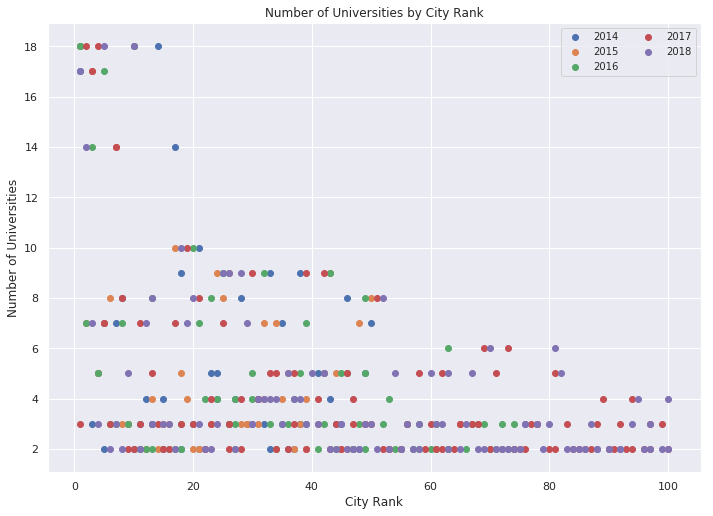

In [44]:
mapping = {'Europe' : 'o', 'North America': 'x', 'Asia': '+',
           'Oceania': '1', 'Latin America': '2', 'Africa': '3'}

cities2014Plot = plt.scatter(cities2014Comp['rank'],cities2014Comp['numberUnis'])
cities2015Plot = plt.scatter(cities2015Comp['rank'],cities2015Comp['numberUnis'])
cities2016Plot = plt.scatter(cities2016Comp['rank'],cities2016Comp['numberUnis'])
cities2017Plot = plt.scatter(cities2017Comp['rank'],cities2017Comp['numberUnis'])
cities2018Plot = plt.scatter(cities2018Comp['rank'],cities2018Comp['numberUnis'])
plt.legend((cities2014Plot,cities2015Plot,cities2016Plot,cities2017Plot,cities2018Plot), 
            ('2014','2015','2016','2017','2018'),
           scatterpoints=1,
           loc='upper right',
           ncol=2, 
           fontsize=10)
plt.xlabel('City Rank')
plt.ylabel('Number of Universities')
plt.title('Number of Universities by City Rank')
plt.savefig('unis_cityRank.eps', format='eps', dpi=900)
plt.show()



### Boxplot/Violin plot of the total cities per country per continent

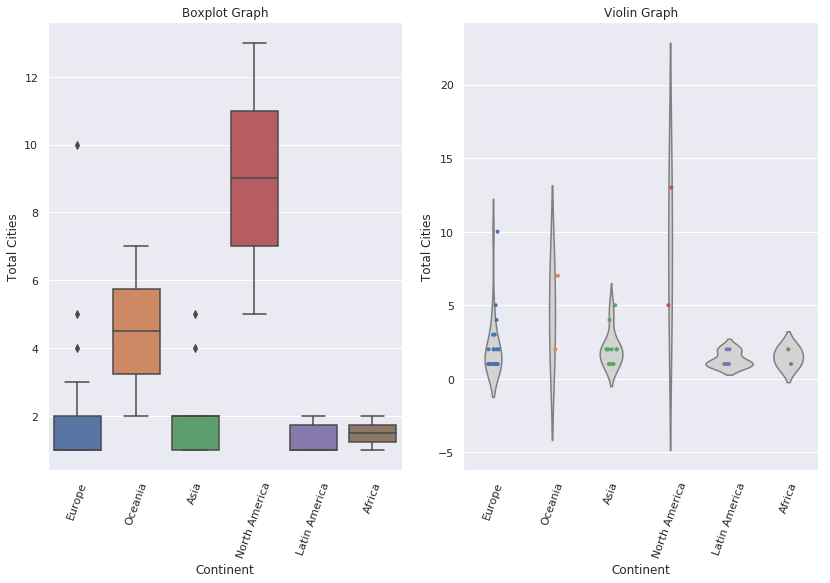

In [45]:
plt.subplot(1,2,1)
sns.boxplot(x='continent',y='totalCities',data=countryCitiesCont)
plt.xlabel('Continent')
plt.ylabel('Total Cities')
plt.title('Boxplot Graph')
plt.xticks(rotation=70)
plt.subplot(1,2,2)
sns.violinplot(x='continent',y='totalCities',data=countryCitiesCont,inner=None,color='lightgray')
sns.stripplot(x='continent',y='totalCities',data=countryCitiesCont,size=4,jitter=True)
plt.xlabel('Continent')
plt.ylabel('Total Cities')
plt.title('Violin Graph')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('boxViol_CitCountCont.eps', format='eps', dpi=900)
plt.show()

### Table by contry with: 

- Total cities ranked
- Total universities
- Continent

In [47]:
countryCitiesCont.head()

,country,totalCities,totalUniPerCountry,continent
0,United Kingdom,10,38,Europe
1,Australia,7,26,Oceania
2,Netherlands,1,2,Europe
3,Turkey,2,10,Asia
4,Greece,1,3,Europe


### Boxplot/Violin plot of total universities per contry per continent

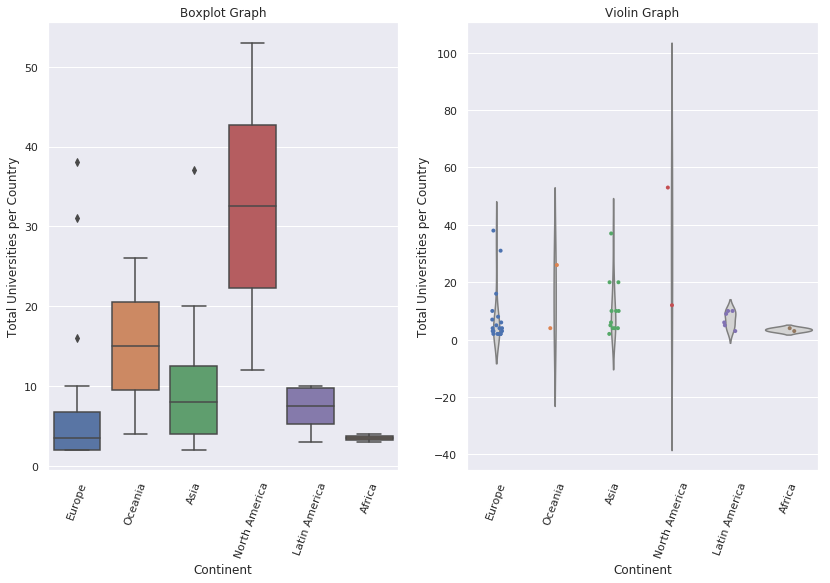

In [48]:
plt.subplot(1,2,1)
sns.boxplot(x='continent',y='totalUniPerCountry',data=countryCitiesCont)
plt.xlabel('Continent')
plt.ylabel('Total Universities per Country')
plt.title('Boxplot Graph')
plt.xticks(rotation=70)
plt.subplot(1,2,2)
sns.violinplot(x='continent',y='totalUniPerCountry',data=countryCitiesCont,inner=None,color='lightgray')
sns.stripplot(x='continent',y='totalUniPerCountry',data=countryCitiesCont,size=4,jitter=True)
plt.xlabel('Continent')
plt.ylabel('Total Universities per Country')
plt.title('Violin Graph')
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('boxViol_unisCountCont.eps', format='eps', dpi=900)
plt.show()